In this notebook I tried diffrent vectorizations method with the best classifier so far(SVM).

# Diffrent Vectorization

- tf-idf -> 55%
- Binary Count Vectorizer -> 51%
- Count Vectorizer: Fast and simple. -> 50%
- Word Embeddings (Word2Vec, GloVe, FastText): Capture semantic relationships between words. -> 52%
- Doc2Vec: Capture document-level semantics. -> 46%
- LSA (SVD): Dimensionality reduction to capture latent structures. -> 53%
- BERT Embeddings: State-of-the-art context-aware embeddings. -> 54%
- Hashing Vectorizer: Efficient for large vocabularies. -> 55%
- N-grams: Capture word sequences and combinations. -> 56%

| Method of Vectorization                                      | Accuracy |
|--------------------------------------------------------------|----------|
| TF-IDF                                                       | 55%      |
|Binary Bag of Words| 51% |
| Count Vectorizer                           | 50%      |
| Word Embeddings (Word2Vec, GloVe, FastText) | 52%      |
| Doc2Vec                | 46%      |
| LSA (SVD) | 53%      |
| BERT Embeddings   | 54%      |
| Hashing Vectorizer        | 55%      |
| N-grams          | 56%      |


## TF-IDF

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import scipy
import numpy as np

In [19]:
data = pd.read_csv("../data/data.csv")

data['target'] = data['target'].replace({1: 1, 2: 1, 3: 2, 4: 3, 5: 3})

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['target'])

tfidf_features = TfidfVectorizer(max_features=5000)
tfidf_comments = TfidfVectorizer(max_features=5000)

X_tfidf_features = tfidf_features.fit_transform(data['features'])
X_tfidf_comments = tfidf_comments.fit_transform(data['comments'].fillna(''))

X_combined = scipy.sparse.hstack([X_tfidf_features, X_tfidf_comments])

X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [20]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

svm_classifier = SVC(kernel='rbf', class_weight=class_weights_dict, C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

        Easy       0.64      0.59      0.61       684
      Medium       0.47      0.51      0.49       694
        Hard       0.56      0.55      0.56       622

    accuracy                           0.55      2000
   macro avg       0.56      0.55      0.55      2000
weighted avg       0.55      0.55      0.55      2000



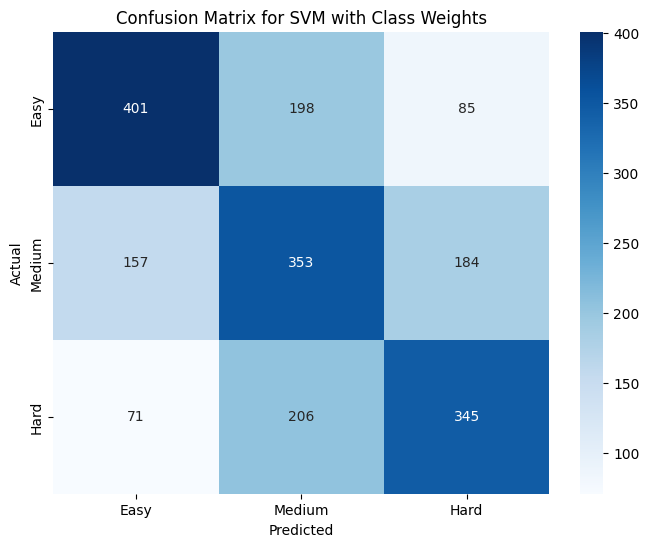

In [21]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Easy', 'Medium', 'Hard']))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Medium', 'Hard'], yticklabels=['Easy', 'Medium', 'Hard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with Class Weights')
plt.show()

## Binary Bag of Words

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import scipy
import numpy as np

In [2]:
data = pd.read_csv("../data/data.csv")

data['target'] = data['target'].replace({1: 1, 2: 1, 3: 2, 4: 3, 5: 3})

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['target'])

count_vectorizer_features = CountVectorizer(max_features=5000, binary=True)
count_vectorizer_comments = CountVectorizer(max_features=5000, binary=True)

X_count_features = count_vectorizer_features.fit_transform(data['features'])
X_count_comments = count_vectorizer_comments.fit_transform(data['comments'].fillna(''))

X_combined = scipy.sparse.hstack([X_count_features, X_count_comments])

X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [3]:
scaler = StandardScaler(with_mean=False)  
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

svm_classifier = SVC(kernel='rbf', class_weight=class_weights_dict, C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

y_pred = svm_classifier.predict(X_test_scaled)

Classification Report:
               precision    recall  f1-score   support

        Easy       0.59      0.54      0.56       684
      Medium       0.45      0.46      0.45       694
        Hard       0.49      0.53      0.51       622

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



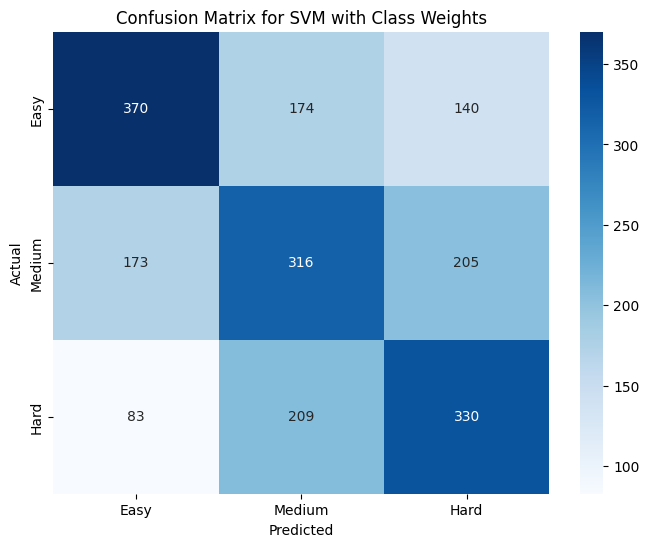

In [4]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Easy', 'Medium', 'Hard']))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Medium', 'Hard'], yticklabels=['Easy', 'Medium', 'Hard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with Class Weights')
plt.show()

## Bag of words

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import scipy
import numpy as np

In [23]:
data = pd.read_csv("../data/data.csv")

data['target'] = data['target'].replace({1: 1, 2: 1, 3: 2, 4: 3, 5: 3})

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['target'])

count_vectorizer_features = CountVectorizer(max_features=5000)
count_vectorizer_comments = CountVectorizer(max_features=5000)

X_count_features = count_vectorizer_features.fit_transform(data['features'])
X_count_comments = count_vectorizer_comments.fit_transform(data['comments'].fillna(''))

X_combined = scipy.sparse.hstack([X_count_features, X_count_comments])

X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [24]:
scaler = StandardScaler(with_mean=False)  
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

svm_classifier = SVC(kernel='rbf', class_weight=class_weights_dict, C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

y_pred = svm_classifier.predict(X_test_scaled)

Classification Report:
               precision    recall  f1-score   support

        Easy       0.61      0.53      0.57       684
      Medium       0.43      0.53      0.47       694
        Hard       0.48      0.43      0.45       622

    accuracy                           0.50      2000
   macro avg       0.51      0.50      0.50      2000
weighted avg       0.51      0.50      0.50      2000



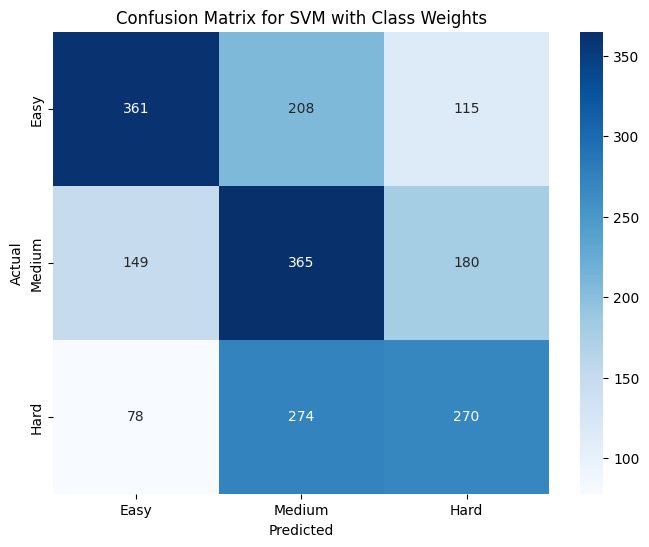

In [25]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Easy', 'Medium', 'Hard']))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Medium', 'Hard'], yticklabels=['Easy', 'Medium', 'Hard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with Class Weights')
plt.show()

## Word2Vec / GloVe

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from nltk.tokenize import word_tokenize
import nltk

In [27]:
nltk.download('punkt')

data = pd.read_csv("../data/data.csv")

data['target'] = data['target'].replace({1: 1, 2: 1, 3: 2, 4: 3, 5: 3})

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['target'])

[nltk_data] Downloading package punkt to /home/lewelotki/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def load_glove_model(glove_file):
    model = {}
    with open(glove_file, 'r', encoding="utf8") as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array([float(val) for val in split_line[1:]])
            model[word] = embedding
    return model

glove_file = './glove.6B/glove.6B.300d.txt'
glove_model = load_glove_model(glove_file)
# Function to compute the document vector by averaging word vectors
def get_average_glove(tokens_list, glove_model, size=300):
    vectors = [glove_model[word] for word in tokens_list if word in glove_model]
    if len(vectors) == 0:
        return np.zeros(size)
    else:
        return np.mean(vectors, axis=0)

In [ ]:
data['tokenized_features'] = data['features'].apply(lambda x: word_tokenize(str(x).lower()))
data['tokenized_comments'] = data['comments'].fillna('').apply(lambda x: word_tokenize(str(x).lower()))

X_glove_features = np.array([get_average_glove(tokens, glove_model, 300) for tokens in data['tokenized_features']])
X_glove_comments = np.array([get_average_glove(tokens, glove_model, 300) for tokens in data['tokenized_comments']])

X_combined = np.hstack([X_glove_features, X_glove_comments])

X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

svm_classifier = SVC(kernel='rbf', class_weight=class_weights_dict, C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

y_pred = svm_classifier.predict(X_test_scaled)

[nltk_data] Downloading package punkt to /home/lewelotki/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Classification Report:
               precision    recall  f1-score   support

        Easy       0.60      0.58      0.59       684
      Medium       0.46      0.48      0.47       694
        Hard       0.51      0.51      0.51       622

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.52      2000
weighted avg       0.53      0.52      0.52      2000



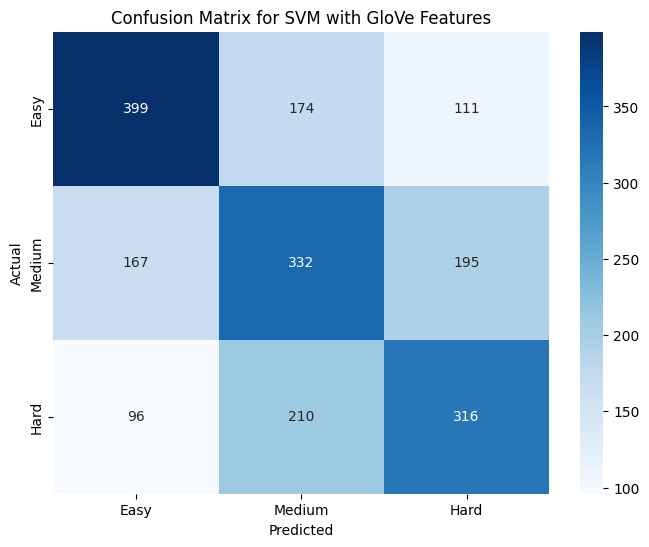

In [2]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Easy', 'Medium', 'Hard']))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Medium', 'Hard'], yticklabels=['Easy', 'Medium', 'Hard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with GloVe Features')
plt.show()

## Doc2Vec

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk

In [ ]:
nltk.download('punkt')

data = pd.read_csv("../data/data.csv")

data['target'] = data['target'].replace({1: 1, 2: 1, 3: 2, 4: 3, 5: 3})

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['target'])

documents = [TaggedDocument(words=word_tokenize(str(row['features']) + " " + str(row['comments']).lower()), tags=[str(i)]) for i, row in data.iterrows()]

doc2vec_model = Doc2Vec(documents, vector_size=300, window=5, min_count=2, workers=4, epochs=40)

X_doc2vec = np.array([doc2vec_model.infer_vector(word_tokenize(str(row['features']) + " " + str(row['comments']).lower())) for _, row in data.iterrows()])

X_train, X_test, y_train, y_test = train_test_split(X_doc2vec, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

svm_classifier = SVC(kernel='rbf', class_weight=class_weights_dict, C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

y_pred = svm_classifier.predict(X_test_scaled)

[nltk_data] Downloading package punkt to /home/lewelotki/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Classification Report:
               precision    recall  f1-score   support

        Easy       0.47      0.65      0.54       684
      Medium       0.44      0.30      0.35       694
        Hard       0.46      0.44      0.45       622

    accuracy                           0.46      2000
   macro avg       0.46      0.46      0.45      2000
weighted avg       0.46      0.46      0.45      2000



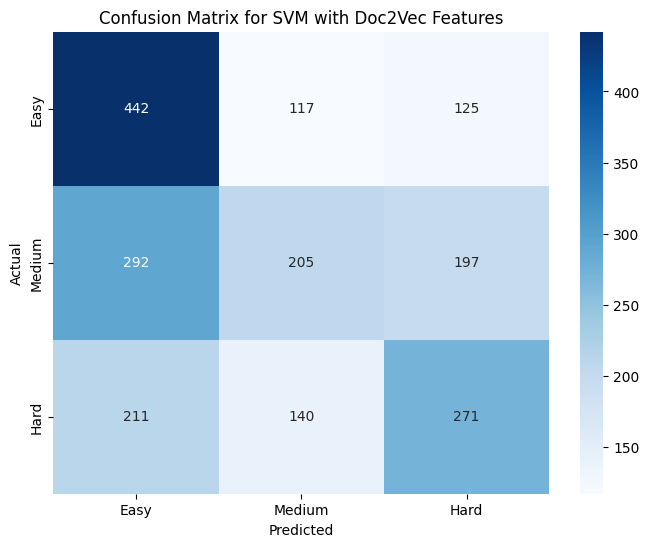

In [3]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Easy', 'Medium', 'Hard']))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Medium', 'Hard'], yticklabels=['Easy', 'Medium', 'Hard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with Doc2Vec Features')
plt.show()

## LSA

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import scipy
import numpy as np

In [ ]:
data = pd.read_csv("../data/data.csv")

data['target'] = data['target'].replace({1: 1, 2: 1, 3: 2, 4: 3, 5: 3})

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['target'])

tfidf_features = TfidfVectorizer(max_features=5000)
tfidf_comments = TfidfVectorizer(max_features=5000)

X_tfidf_features = tfidf_features.fit_transform(data['features'])
X_tfidf_comments = tfidf_comments.fit_transform(data['comments'].fillna(''))

X_combined = scipy.sparse.hstack([X_tfidf_features, X_tfidf_comments])

svd = TruncatedSVD(n_components=300, random_state=42)
X_lsa = svd.fit_transform(X_combined)

X_train, X_test, y_train, y_test = train_test_split(X_lsa, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

svm_classifier = SVC(kernel='rbf', class_weight=class_weights_dict, C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

y_pred = svm_classifier.predict(X_test_scaled)

Classification Report:
               precision    recall  f1-score   support

        Easy       0.62      0.59      0.60       684
      Medium       0.45      0.46      0.45       694
        Hard       0.53      0.55      0.54       622

    accuracy                           0.53      2000
   macro avg       0.53      0.53      0.53      2000
weighted avg       0.53      0.53      0.53      2000



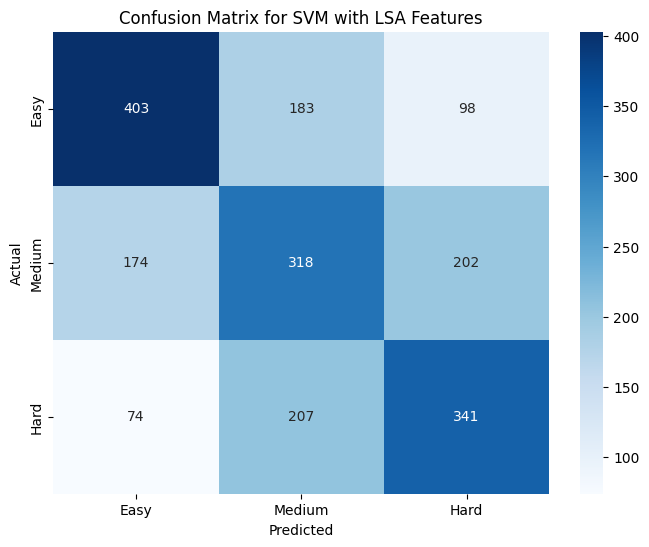

In [4]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Easy', 'Medium', 'Hard']))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Medium', 'Hard'], yticklabels=['Easy', 'Medium', 'Hard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with LSA Features')
plt.show()

## BERT

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import torch
from transformers import BertTokenizer, BertModel
import numpy as np

In [ ]:
data = pd.read_csv("../data/data.csv")

data['target'] = data['target'].replace({1: 1, 2: 1, 3: 2, 4: 3, 5: 3})

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['target'])

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

data['bert_features'] = data['features'].apply(lambda x: get_bert_embeddings(str(x), tokenizer, model))
data['bert_comments'] = data['comments'].fillna('').apply(lambda x: get_bert_embeddings(str(x), tokenizer, model))

X_bert_features = np.stack(data['bert_features'].values)
X_bert_comments = np.stack(data['bert_comments'].values)

X_combined = np.hstack([X_bert_features, X_bert_comments])

X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

svm_classifier = SVC(kernel='rbf', class_weight=class_weights_dict, C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

y_pred = svm_classifier.predict(X_test_scaled)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Classification Report:
               precision    recall  f1-score   support

        Easy       0.61      0.59      0.60       684
      Medium       0.49      0.50      0.50       694
        Hard       0.52      0.53      0.53       622

    accuracy                           0.54      2000
   macro avg       0.54      0.54      0.54      2000
weighted avg       0.54      0.54      0.54      2000



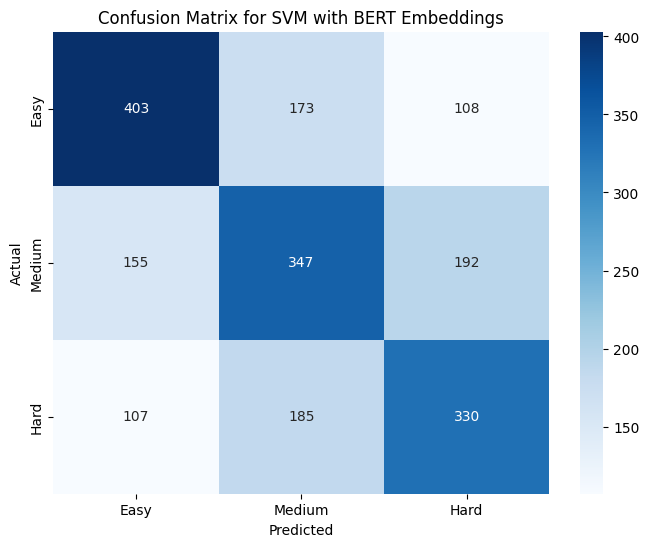

In [5]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Easy', 'Medium', 'Hard']))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Medium', 'Hard'], yticklabels=['Easy', 'Medium', 'Hard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with BERT Embeddings')
plt.show()

## Hashing Vectorizer

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import scipy
import numpy as np

In [ ]:
data = pd.read_csv("../data/data.csv")

data['target'] = data['target'].replace({1: 1, 2: 1, 3: 2, 4: 3, 5: 3})

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['target'])

hashing_features = HashingVectorizer(n_features=5000, alternate_sign=False)
hashing_comments = HashingVectorizer(n_features=5000, alternate_sign=False)

X_hash_features = hashing_features.transform(data['features'])
X_hash_comments = hashing_comments.transform(data['comments'].fillna(''))

X_combined = scipy.sparse.hstack([X_hash_features, X_hash_comments])

X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [ ]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

svm_classifier = SVC(kernel='rbf', class_weight=class_weights_dict, C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

        Easy       0.62      0.60      0.61       684
      Medium       0.47      0.50      0.49       694
        Hard       0.56      0.55      0.56       622

    accuracy                           0.55      2000
   macro avg       0.55      0.55      0.55      2000
weighted avg       0.55      0.55      0.55      2000



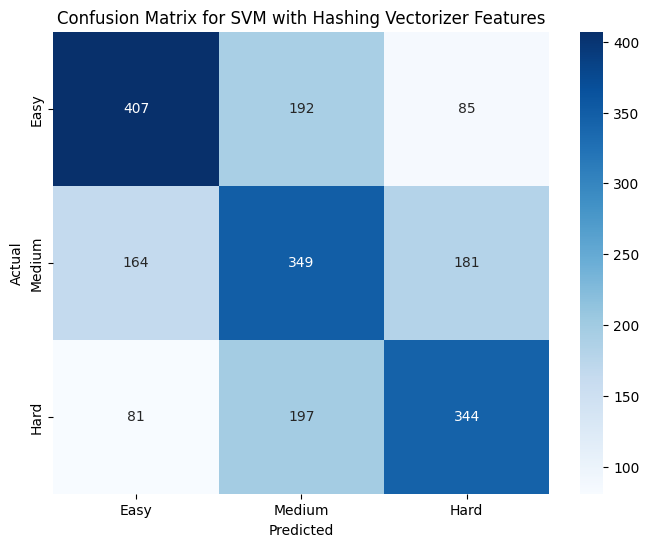

In [6]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Easy', 'Medium', 'Hard']))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Medium', 'Hard'], yticklabels=['Easy', 'Medium', 'Hard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with Hashing Vectorizer Features')
plt.show()

## N-grams

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import scipy
import numpy as np

In [ ]:
data = pd.read_csv("../data/data.csv")

data['target'] = data['target'].replace({1: 1, 2: 1, 3: 2, 4: 3, 5: 3})

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['target'])

ngram_features = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
ngram_comments = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))

X_ngram_features = ngram_features.fit_transform(data['features'])
X_ngram_comments = ngram_comments.fit_transform(data['comments'].fillna(''))

X_combined = scipy.sparse.hstack([X_ngram_features, X_ngram_comments])

X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [ ]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

svm_classifier = SVC(kernel='rbf', class_weight=class_weights_dict, C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

        Easy       0.66      0.61      0.63       684
      Medium       0.47      0.52      0.50       694
        Hard       0.57      0.56      0.57       622

    accuracy                           0.56      2000
   macro avg       0.57      0.56      0.57      2000
weighted avg       0.57      0.56      0.57      2000



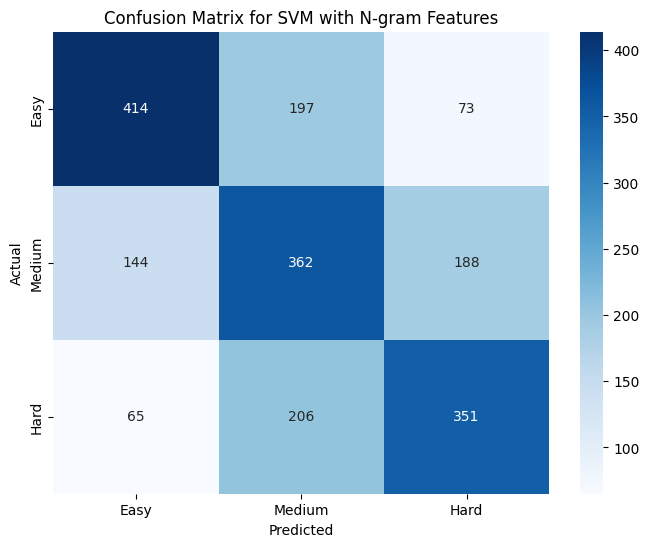

In [7]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Easy', 'Medium', 'Hard']))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Medium', 'Hard'], yticklabels=['Easy', 'Medium', 'Hard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with N-gram Features')
plt.show()

# Ensemble model

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier

In [2]:
data = pd.read_csv("../data/data.csv")

data['target'] = data['target'].replace({1: 1, 2: 1, 3: 2, 4: 3, 5: 3})

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['target'])

ngram_features = TfidfVectorizer(max_features=5000, ngram_range=(1, 4))
ngram_comments = TfidfVectorizer(max_features=5000, ngram_range=(1, 4))

X_ngram_features = ngram_features.fit_transform(data['features'])
X_ngram_comments = ngram_comments.fit_transform(data['comments'].fillna(''))

X_combined = scipy.sparse.hstack([X_ngram_features, X_ngram_comments])

X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [ ]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

n_chunks = 5
X_train_chunks = np.array_split(X_train.toarray(), n_chunks)
y_train_chunks = np.array_split(y_train, n_chunks)

svm_classifiers = []

for i in range(n_chunks):
    svm_classifier = SVC(kernel='rbf', class_weight=class_weights_dict, C=1.0, gamma='scale', random_state=42)
    svm_classifier.fit(X_train_chunks[i], y_train_chunks[i])
    svm_classifiers.append((f'svm_{i}', svm_classifier))

ensemble_model = VotingClassifier(estimators=svm_classifiers, voting='hard')

ensemble_model.fit(X_train.toarray(), y_train)

y_pred = ensemble_model.predict(X_test.toarray())

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Easy', 'Medium', 'Hard']))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Medium', 'Hard'], yticklabels=['Easy', 'Medium', 'Hard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Ensemble SVM Model')
plt.show()

# Data augmention

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
import scipy
import numpy as np

In [2]:
data = pd.read_csv("../data/data.csv")

data['target'] = data['target'].replace({1: 1, 2: 1, 3: 2, 4: 3, 5: 3})

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['target'])

ngram_features = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
ngram_comments = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))

X_ngram_features = ngram_features.fit_transform(data['features'])
X_ngram_comments = ngram_comments.fit_transform(data['comments'].fillna(''))

X_combined = scipy.sparse.hstack([X_ngram_features, X_ngram_comments])

X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [3]:
smote = SMOTE(random_state=42)

pipeline = make_pipeline(
    smote,
    StandardScaler(with_mean=False),
    SVC(kernel='rbf', class_weight='balanced', C=1.0, gamma='scale', random_state=42)
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

        Easy       0.65      0.52      0.58       684
      Medium       0.43      0.58      0.49       694
        Hard       0.55      0.46      0.50       622

    accuracy                           0.52      2000
   macro avg       0.54      0.52      0.52      2000
weighted avg       0.54      0.52      0.52      2000



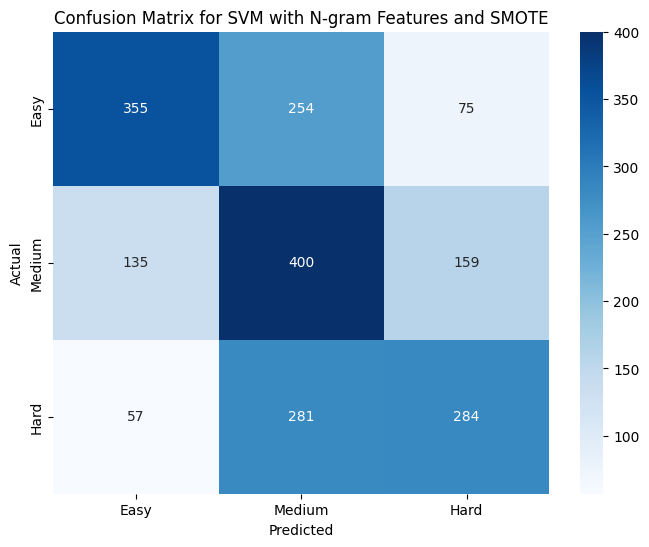

In [4]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Easy', 'Medium', 'Hard']))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Medium', 'Hard'], yticklabels=['Easy', 'Medium', 'Hard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with N-gram Features and SMOTE')
plt.show()

# Different N-gram

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import scipy
import numpy as np

In [2]:
data = pd.read_csv("../data/data.csv")

data['target'] = data['target'].replace({1: 1, 2: 1, 3: 2, 4: 3, 5: 3})

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['target'])

ngram_features = TfidfVectorizer(max_features=5000, ngram_range=(1, 4))
ngram_comments = TfidfVectorizer(max_features=5000, ngram_range=(1, 4))

X_ngram_features = ngram_features.fit_transform(data['features'])
X_ngram_comments = ngram_comments.fit_transform(data['comments'].fillna(''))

X_combined = scipy.sparse.hstack([X_ngram_features, X_ngram_comments])

X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [3]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

svm_classifier = SVC(kernel='rbf', class_weight=class_weights_dict, C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

        Easy       0.66      0.61      0.63       684
      Medium       0.47      0.52      0.50       694
        Hard       0.57      0.55      0.56       622

    accuracy                           0.56      2000
   macro avg       0.57      0.56      0.56      2000
weighted avg       0.57      0.56      0.56      2000



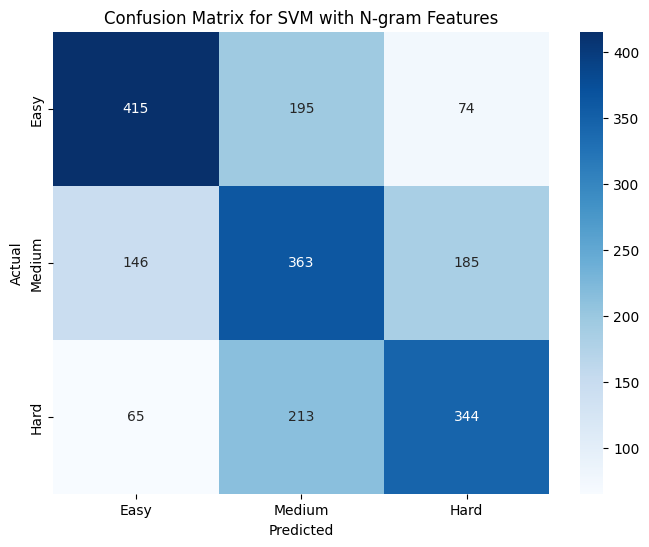

In [4]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Easy', 'Medium', 'Hard']))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Medium', 'Hard'], yticklabels=['Easy', 'Medium', 'Hard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with N-gram Features')
plt.show()

# PCA

Classification Report:
               precision    recall  f1-score   support

        Easy       0.65      0.56      0.60       684
      Medium       0.44      0.53      0.48       694
        Hard       0.54      0.51      0.53       622

    accuracy                           0.53      2000
   macro avg       0.54      0.53      0.54      2000
weighted avg       0.54      0.53      0.54      2000



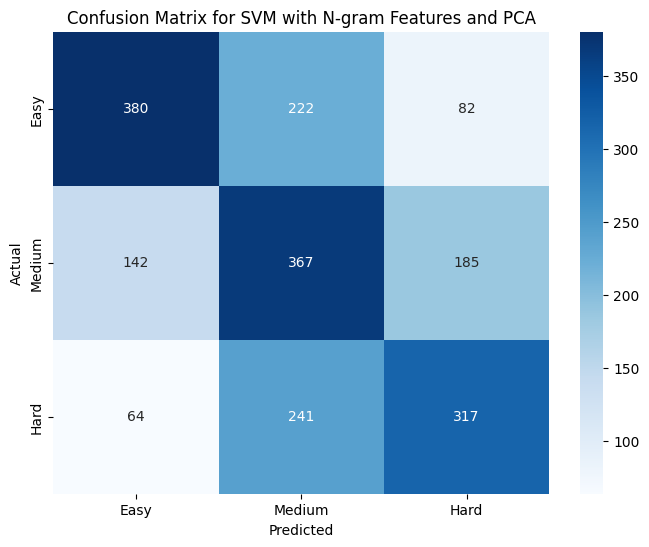

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import scipy
import numpy as np
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# Load data
data = pd.read_csv("../data/data.csv")

# Adjust the target variable
data['target'] = data['target'].replace({1: 1, 2: 1, 3: 2, 4: 3, 5: 3})

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['target'])

# Use TfidfVectorizer with N-grams for 'features' and 'comments'
ngram_features = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
ngram_comments = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))

X_ngram_features = ngram_features.fit_transform(data['features'])
X_ngram_comments = ngram_comments.fit_transform(data['comments'].fillna(''))

# Combine the N-gram feature sets
X_combined = scipy.sparse.hstack([X_ngram_features, X_ngram_comments])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Standard scaling (for PCA)
scaler = StandardScaler(with_mean=False)

# PCA with 0.95 explained variance
pca = PCA(n_components=0.95)

# SVM classifier with the computed class weights
svm_classifier = SVC(kernel='rbf', class_weight=class_weights_dict, C=1.0, gamma='scale', random_state=42)

# Create a pipeline for scaling, PCA, and SVM
pipeline = make_pipeline(scaler, pca, svm_classifier)

# Fit the pipeline
pipeline.fit(X_train.toarray(), y_train)

# Predict the labels on the test set
y_pred = pipeline.predict(X_test.toarray())

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Easy', 'Medium', 'Hard']))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Medium', 'Hard'], yticklabels=['Easy', 'Medium', 'Hard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with N-gram Features and PCA')
plt.show()
